# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [1]:
import numpy as np
from tensorflow import keras
from keras import layers, regularizers
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data

In [2]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [3]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.standard_normal(xtrain.shape)  # train data includes some noise

In [4]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 1)


Simulate test data

In [5]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [6]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [15]:
nb_nodes = 50
#nb_layers = 1
activation = "relu"

model = keras.models.Sequential(name="1Dfit")
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=regularizers.l2(0.01) ,input_dim=xtrain.shape[1]))  # first layer
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=regularizers.l2(0.01)))  # second layer
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=regularizers.l2(0.01)))  # third layer
model.add(layers.Dense(1))  # final layer

print(model.summary())

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                100       
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5251 (20.51 KB)
Trainable params: 5251 (20.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [16]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer = adam)

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [17]:
epochs = 30
save_period = 3   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/30
157/157 [==============================] - 3s 10ms/step - loss: 6.0031
Epoch 2/30
157/157 [==============================] - 2s 10ms/step - loss: 4.3499
Epoch 3/30
157/157 [==============================] - 2s 12ms/step - loss: 4.1162
Epoch 4/30
157/157 [==============================] - 2s 10ms/step - loss: 4.0162
Epoch 5/30
157/157 [==============================] - 2s 10ms/step - loss: 3.9056
Epoch 6/30
157/157 [==============================] - 2s 10ms/step - loss: 3.7536
Epoch 7/30
157/157 [==============================] - 2s 11ms/step - loss: 3.6032
Epoch 8/30
157/157 [==============================] - 2s 10ms/step - loss: 3.4822
Epoch 9/30
157/157 [==============================] - 2s 11ms/step - loss: 3.4329
Epoch 10/30
157/157 [==============================] - 2s 12ms/step - loss: 3.3814
Epoch 11/30
157/157 [==============================] - 2s 10ms/step - loss: 3.3051
Epoch 12/30
157/157 [==============================] - 2s 10ms/step - loss: 3.2689
Epoch 13/30
1

Compare the performance of the model during the training. You may use the skeleton below:

313/313 [==============================] - 1s 2ms/step


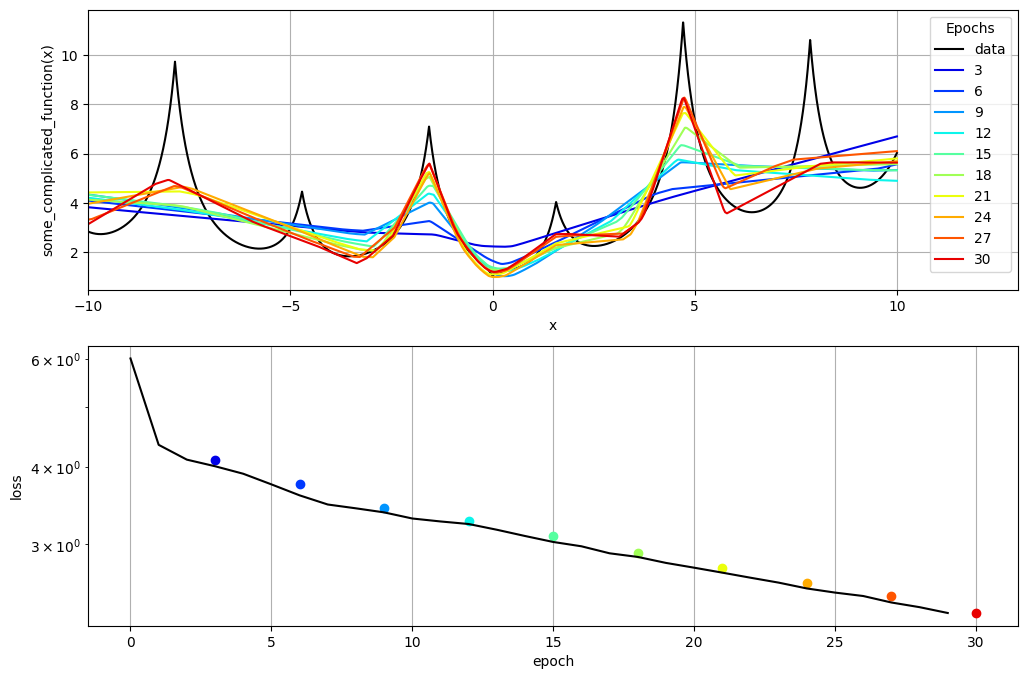

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

General Comment

In this exercise we create some complicaded one dimensional function and then generate 10000 random samples from the function (plus some noice) on the interval [-10,10]. Then we created and trained the model on the data. It was clear that the more complex (more neurons and layers) the better the model would performe. This is not true to a fault, but it shows that in order to model a complex function you need a complex model.